# Classifica√ß√£o de tweets

In [1]:
import string
import re

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn import svm
from statistics import mean

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import cross_val_score, GridSearchCV

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 10]

In [49]:
import warnings
warnings.filterwarnings('ignore')

# Metodologia utilizada neste notebook

Neste notebook, est√° o passo a passo dos testes realizados com classificadores na base de tweets coletados relacionados aos candidatos √† presid√™ncia da Rep√∫blica e classificados utilizando o CLAM.


## Limpeza do corpus

M√©todo para remo√ß√£o de emojis dos tweets e importa√ß√£o do arquivo de stopwords.

In [50]:
emojistring = '''üòÄ üòÅ üòÇ ü§£ üòÉ üòÑ üòÖ üòÜ üòâ üòä üòã üòé üòç üòò üòó üòô üòö ‚ò∫Ô∏è üôÇ ü§ó ü§© ü§î ü§® üòê üòë üò∂ üôÑ üòè üò£ üò• üòÆ ü§ê üòØ üò™ üò´ üò¥ üòå üòõ üòú üòù ü§§ üòí üòì üòî üòï üôÉ ü§ë üò≤ ‚òπÔ∏è üôÅ üòñ üòû üòü üò§ üò¢ üò≠ üò¶ üòß üò® üò© ü§Ø üò¨ üò∞ üò± üò≥ ü§™ üòµ üò° üò† ü§¨ üò∑ ü§í ü§ï ü§¢ ü§Æ ü§ß üòá ü§† ü§° ü§• ü§´ ü§≠ üßê ü§ì üòà üëø üëπ üë∫ üíÄ üëª üëΩ ü§ñ üí© üò∫ üò∏ üòπ üòª üòº üòΩ üôÄ üòø üòæ
üë∂ üë¶ üëß üë® üë© üë¥ üëµ üë®‚Äç‚öïÔ∏è üë©‚Äç‚öïÔ∏è üë®‚Äçüéì üë©‚Äçüéì üë®‚Äç‚öñÔ∏è üë©‚Äç‚öñÔ∏è üë®‚Äçüåæ üë©‚Äçüåæ üë®‚Äçüç≥ üë©‚Äçüç≥ üë®‚Äçüîß üë©‚Äçüîß üë®‚Äçüè≠ üë©‚Äçüè≠ üë®‚Äçüíº üë©‚Äçüíº üë®‚Äçüî¨ üë©‚Äçüî¨ üë®‚Äçüíª üë©‚Äçüíª üë®‚Äçüé§ üë©‚Äçüé§ üë®‚Äçüé® üë©‚Äçüé® üë®‚Äç‚úàÔ∏è üë©‚Äç‚úàÔ∏è üë®‚ÄçüöÄ üë©‚ÄçüöÄ üë®‚Äçüöí üë©‚Äçüöí üëÆ üëÆ‚Äç‚ôÇÔ∏è üëÆ‚Äç‚ôÄÔ∏è üïµ üïµÔ∏è‚Äç‚ôÇÔ∏è üïµÔ∏è‚Äç‚ôÄÔ∏è üíÇ üíÇ‚Äç‚ôÇÔ∏è üíÇ‚Äç‚ôÄÔ∏è üë∑ üë∑‚Äç‚ôÇÔ∏è üë∑‚Äç‚ôÄÔ∏è ü§¥ üë∏ üë≥ üë≥‚Äç‚ôÇÔ∏è üë≥‚Äç‚ôÄÔ∏è üë≤ üßï üßî üë± üë±‚Äç‚ôÇÔ∏è üë±‚Äç‚ôÄÔ∏è ü§µ üë∞ ü§∞ ü§± üëº üéÖ ü§∂ üßô‚Äç‚ôÄÔ∏è üßô‚Äç‚ôÇÔ∏è üßö‚Äç‚ôÄÔ∏è üßö‚Äç‚ôÇÔ∏è üßõ‚Äç‚ôÄÔ∏è üßõ‚Äç‚ôÇÔ∏è üßú‚Äç‚ôÄÔ∏è üßú‚Äç‚ôÇÔ∏è üßù‚Äç‚ôÄÔ∏è üßù‚Äç‚ôÇÔ∏è üßû‚Äç‚ôÄÔ∏è üßû‚Äç‚ôÇÔ∏è üßü‚Äç‚ôÄÔ∏è üßü‚Äç‚ôÇÔ∏è üôç üôç‚Äç‚ôÇÔ∏è üôç‚Äç‚ôÄÔ∏è üôé üôé‚Äç‚ôÇÔ∏è üôé‚Äç‚ôÄÔ∏è üôÖ üôÖ‚Äç‚ôÇÔ∏è üôÖ‚Äç‚ôÄÔ∏è üôÜ üôÜ‚Äç‚ôÇÔ∏è üôÜ‚Äç‚ôÄÔ∏è üíÅ üíÅ‚Äç‚ôÇÔ∏è üíÅ‚Äç‚ôÄÔ∏è üôã üôã‚Äç‚ôÇÔ∏è üôã‚Äç‚ôÄÔ∏è üôá üôá‚Äç‚ôÇÔ∏è üôá‚Äç‚ôÄÔ∏è ü§¶ ü§¶‚Äç‚ôÇÔ∏è ü§¶‚Äç‚ôÄÔ∏è ü§∑ ü§∑‚Äç‚ôÇÔ∏è ü§∑‚Äç‚ôÄÔ∏è üíÜ üíÜ‚Äç‚ôÇÔ∏è üíÜ‚Äç‚ôÄÔ∏è üíá üíá‚Äç‚ôÇÔ∏è üíá‚Äç‚ôÄÔ∏è üö∂ üö∂‚Äç‚ôÇÔ∏è üö∂‚Äç‚ôÄÔ∏è üèÉ üèÉ‚Äç‚ôÇÔ∏è üèÉ‚Äç‚ôÄÔ∏è üíÉ üï∫ üëØ üëØ‚Äç‚ôÇÔ∏è üëØ‚Äç‚ôÄÔ∏è üßñ‚Äç‚ôÄÔ∏è üßñ‚Äç‚ôÇÔ∏è üï¥ üó£ üë§ üë• üë´ üë¨ üë≠ üíè üë®‚Äç‚ù§Ô∏è‚Äçüíã‚Äçüë® üë©‚Äç‚ù§Ô∏è‚Äçüíã‚Äçüë© üíë üë®‚Äç‚ù§Ô∏è‚Äçüë® üë©‚Äç‚ù§Ô∏è‚Äçüë© üë™ üë®‚Äçüë©‚Äçüë¶ üë®‚Äçüë©‚Äçüëß üë®‚Äçüë©‚Äçüëß‚Äçüë¶ üë®‚Äçüë©‚Äçüë¶‚Äçüë¶ üë®‚Äçüë©‚Äçüëß‚Äçüëß üë®‚Äçüë®‚Äçüë¶ üë®‚Äçüë®‚Äçüëß üë®‚Äçüë®‚Äçüëß‚Äçüë¶ üë®‚Äçüë®‚Äçüë¶‚Äçüë¶ üë®‚Äçüë®‚Äçüëß‚Äçüëß üë©‚Äçüë©‚Äçüë¶ üë©‚Äçüë©‚Äçüëß üë©‚Äçüë©‚Äçüëß‚Äçüë¶ üë©‚Äçüë©‚Äçüë¶‚Äçüë¶ üë©‚Äçüë©‚Äçüëß‚Äçüëß üë®‚Äçüë¶ üë®‚Äçüë¶‚Äçüë¶ üë®‚Äçüëß üë®‚Äçüëß‚Äçüë¶ üë®‚Äçüëß‚Äçüëß üë©‚Äçüë¶ üë©‚Äçüë¶‚Äçüë¶ üë©‚Äçüëß üë©‚Äçüëß‚Äçüë¶ üë©‚Äçüëß‚Äçüëß ü§≥ üí™ üëà üëâ ‚òùÔ∏è üëÜ üñï üëá ‚úåÔ∏è ü§û üññ ü§ò üñê ‚úã üëå üëç üëé ‚úä üëä ü§õ ü§ú ü§ö üëã ü§ü ‚úçÔ∏è üëè üëê üôå ü§≤ üôè ü§ù üíÖ üëÇ üëÉ üë£ üëÄ üëÅ üß† üëÖ üëÑ üíã

üëì üï∂ üëî üëï üëñ üß£ üß§ üß• üß¶ üëó üëò üëô üëö üëõ üëú üëù üéí üëû üëü üë† üë° üë¢ üëë üëí üé© üéì üß¢ ‚õë üíÑ üíç üåÇ üíº
üëêüèª üôåüèª üëèüèª üôèüèª üëçüèª üëéüèª üëäüèª ‚úäüèª ü§õüèª ü§úüèª ü§ûüèª ‚úåüèª ü§òüèª üëåüèª üëàüèª üëâüèª üëÜüèª üëáüèª ‚òùüèª ‚úãüèª ü§öüèª üñêüèª üññüèª üëãüèª ü§ôüèª üí™üèª üñïüèª ‚úçüèª ü§≥üèª üíÖüèª üëÇüèª üëÉüèª üë∂üèª üë¶üèª üëßüèª üë®üèª üë©üèª üë±üèª‚Äç‚ôÄÔ∏è üë±üèª üë¥üèª üëµüèª üë≤üèª üë≥üèª‚Äç‚ôÄÔ∏è üë≥üèª üëÆüèª‚Äç‚ôÄÔ∏è üëÆüèª üë∑üèª‚Äç‚ôÄÔ∏è üë∑üèª üíÇüèª‚Äç‚ôÄÔ∏è üíÇüèª üïµüèª‚Äç‚ôÄÔ∏è üïµüèª üë©üèª‚Äç‚öïÔ∏è üë®üèª‚Äç‚öïÔ∏è üë©üèª‚Äçüåæ üë®üèª‚Äçüåæ üë©üèª‚Äçüç≥ üë®üèª‚Äçüç≥ üë©üèª‚Äçüéì üë®üèª‚Äçüéì üë©üèª‚Äçüé§ üë®üèª‚Äçüé§ üë©üèª‚Äçüè´ üë®üèª‚Äçüè´ üë©üèª‚Äçüè≠ üë®üèª‚Äçüè≠ üë©üèª‚Äçüíª üë®üèª‚Äçüíª üë©üèª‚Äçüíº üë®üèª‚Äçüíº üë©üèª‚Äçüîß üë®üèª‚Äçüîß üë©üèª‚Äçüî¨ üë®üèª‚Äçüî¨ üë©üèª‚Äçüé® üë®üèª‚Äçüé® üë©üèª‚Äçüöí üë®üèª‚Äçüöí üë©üèª‚Äç‚úàÔ∏è üë®üèª‚Äç‚úàÔ∏è üë©üèª‚ÄçüöÄ üë®üèª‚ÄçüöÄ üë©üèª‚Äç‚öñÔ∏è üë®üèª‚Äç‚öñÔ∏è ü§∂üèª üéÖüèª üë∏üèª ü§¥üèª üë∞üèª ü§µüèª üëºüèª ü§∞üèª üôáüèª‚Äç‚ôÄÔ∏è üôáüèª üíÅüèª üíÅüèª‚Äç‚ôÇÔ∏è üôÖüèª üôÖüèª‚Äç‚ôÇÔ∏è üôÜüèª üôÜüèª‚Äç‚ôÇÔ∏è üôãüèª üôãüèª‚Äç‚ôÇÔ∏è ü§¶üèª‚Äç‚ôÄÔ∏è ü§¶üèª‚Äç‚ôÇÔ∏è ü§∑üèª‚Äç‚ôÄÔ∏è ü§∑üèª‚Äç‚ôÇÔ∏è üôéüèª üôéüèª‚Äç‚ôÇÔ∏è üôçüèª üôçüèª‚Äç‚ôÇÔ∏è üíáüèª üíáüèª‚Äç‚ôÇÔ∏è üíÜüèª üíÜüèª‚Äç‚ôÇÔ∏è üï¥üèª üíÉüèª üï∫üèª üö∂üèª‚Äç‚ôÄÔ∏è üö∂üèª üèÉüèª‚Äç‚ôÄÔ∏è üèÉüèª üèãüèª‚Äç‚ôÄÔ∏è üèãüèª ü§∏üèª‚Äç‚ôÄÔ∏è ü§∏üèª‚Äç‚ôÇÔ∏è ‚õπüèª‚Äç‚ôÄÔ∏è ‚õπüèª ü§æüèª‚Äç‚ôÄÔ∏è ü§æüèª‚Äç‚ôÇÔ∏è üèåüèª‚Äç‚ôÄÔ∏è üèåüèª üèÑüèª‚Äç‚ôÄÔ∏è üèÑüèª üèäüèª‚Äç‚ôÄÔ∏è üèäüèª ü§Ωüèª‚Äç‚ôÄÔ∏è ü§Ωüèª‚Äç‚ôÇÔ∏è üö£üèª‚Äç‚ôÄÔ∏è üö£üèª üèáüèª üö¥üèª‚Äç‚ôÄÔ∏è üö¥üèª üöµüèª‚Äç‚ôÄÔ∏è üöµüèª ü§πüèª‚Äç‚ôÄÔ∏è ü§πüèª‚Äç‚ôÇÔ∏è üõÄüèª

üëêüèº üôåüèº üëèüèº üôèüèº üëçüèº üëéüèº üëäüèº ‚úäüèº ü§õüèº ü§úüèº ü§ûüèº ‚úåüèº ü§òüèº üëåüèº üëàüèº üëâüèº üëÜüèº üëáüèº ‚òùüèº ‚úãüèº ü§öüèº üñêüèº üññüèº üëãüèº ü§ôüèº üí™üèº üñïüèº ‚úçüèº ü§≥üèº üíÖüèº üëÇüèº üëÉüèº üë∂üèº üë¶üèº üëßüèº üë®üèº üë©üèº üë±üèº‚Äç‚ôÄÔ∏è üë±üèº üë¥üèº üëµüèº üë≤üèº üë≥üèº‚Äç‚ôÄÔ∏è üë≥üèº üëÆüèº‚Äç‚ôÄÔ∏è üëÆüèº üë∑üèº‚Äç‚ôÄÔ∏è üë∑üèº üíÇüèº‚Äç‚ôÄÔ∏è üíÇüèº üïµüèº‚Äç‚ôÄÔ∏è üïµüèº üë©üèº‚Äç‚öïÔ∏è üë®üèº‚Äç‚öïÔ∏è üë©üèº‚Äçüåæ üë®üèº‚Äçüåæ üë©üèº‚Äçüç≥ üë®üèº‚Äçüç≥ üë©üèº‚Äçüéì üë®üèº‚Äçüéì üë©üèº‚Äçüé§ üë®üèº‚Äçüé§ üë©üèº‚Äçüè´ üë®üèº‚Äçüè´ üë©üèº‚Äçüè≠ üë®üèº‚Äçüè≠ üë©üèº‚Äçüíª üë®üèº‚Äçüíª üë©üèº‚Äçüíº üë®üèº‚Äçüíº üë©üèº‚Äçüîß üë®üèº‚Äçüîß üë©üèº‚Äçüî¨ üë®üèº‚Äçüî¨ üë©üèº‚Äçüé® üë®üèº‚Äçüé® üë©üèº‚Äçüöí üë®üèº‚Äçüöí üë©üèº‚Äç‚úàÔ∏è üë®üèº‚Äç‚úàÔ∏è üë©üèº‚ÄçüöÄ üë®üèº‚ÄçüöÄ üë©üèº‚Äç‚öñÔ∏è üë®üèº‚Äç‚öñÔ∏è ü§∂üèº üéÖüèº üë∏üèº ü§¥üèº üë∞üèº ü§µüèº üëºüèº ü§∞üèº üôáüèº‚Äç‚ôÄÔ∏è üôáüèº üíÅüèº üíÅüèº‚Äç‚ôÇÔ∏è üôÖüèº üôÖüèº‚Äç‚ôÇÔ∏è üôÜüèº üôÜüèº‚Äç‚ôÇÔ∏è üôãüèº üôãüèº‚Äç‚ôÇÔ∏è ü§¶üèº‚Äç‚ôÄÔ∏è ü§¶üèº‚Äç‚ôÇÔ∏è ü§∑üèº‚Äç‚ôÄÔ∏è ü§∑üèº‚Äç‚ôÇÔ∏è üôéüèº üôéüèº‚Äç‚ôÇÔ∏è üôçüèº üôçüèº‚Äç‚ôÇÔ∏è üíáüèº üíáüèº‚Äç‚ôÇÔ∏è üíÜüèº üíÜüèº‚Äç‚ôÇÔ∏è üï¥üèº üíÉüèº üï∫üèº üö∂üèº‚Äç‚ôÄÔ∏è üö∂üèº üèÉüèº‚Äç‚ôÄÔ∏è üèÉüèº üèãüèº‚Äç‚ôÄÔ∏è üèãüèº ü§∏üèº‚Äç‚ôÄÔ∏è ü§∏üèº‚Äç‚ôÇÔ∏è ‚õπüèº‚Äç‚ôÄÔ∏è ‚õπüèº ü§æüèº‚Äç‚ôÄÔ∏è ü§æüèº‚Äç‚ôÇÔ∏è üèåüèº‚Äç‚ôÄÔ∏è üèåüèº üèÑüèº‚Äç‚ôÄÔ∏è üèÑüèº üèäüèº‚Äç‚ôÄÔ∏è üèäüèº ü§Ωüèº‚Äç‚ôÄÔ∏è ü§Ωüèº‚Äç‚ôÇÔ∏è üö£üèº‚Äç‚ôÄÔ∏è üö£üèº üèáüèº üö¥üèº‚Äç‚ôÄÔ∏è üö¥üèº üöµüèº‚Äç‚ôÄÔ∏è üöµüèª ü§πüèº‚Äç‚ôÄÔ∏è ü§πüèº‚Äç‚ôÇÔ∏è üõÄüèº

üëêüèΩ üôåüèΩ üëèüèΩ üôèüèΩ üëçüèΩ üëéüèΩ üëäüèΩ ‚úäüèΩ ü§õüèΩ ü§úüèΩ ü§ûüèΩ ‚úåüèΩ ü§òüèΩ üëåüèΩ üëàüèΩ üëâüèΩ üëÜüèΩ üëáüèΩ ‚òùüèΩ ‚úãüèΩ ü§öüèΩ üñêüèΩ üññüèΩ üëãüèΩ ü§ôüèΩ üí™üèΩ üñïüèΩ ‚úçüèΩ ü§≥üèΩ üíÖüèΩ üëÇüèΩ üëÉüèΩ üë∂üèΩ üë¶üèΩ üëßüèΩ üë®üèΩ üë©üèΩ üë±üèΩ‚Äç‚ôÄÔ∏è üë±üèΩ üë¥üèΩ üëµüèΩ üë≤üèΩ üë≥üèΩ‚Äç‚ôÄÔ∏è üë≥üèΩ üëÆüèΩ‚Äç‚ôÄÔ∏è üëÆüèΩ üë∑üèΩ‚Äç‚ôÄÔ∏è üë∑üèΩ üíÇüèΩ‚Äç‚ôÄÔ∏è üíÇüèΩ üïµüèΩ‚Äç‚ôÄÔ∏è üïµüèΩ üë©üèΩ‚Äç‚öïÔ∏è üë®üèΩ‚Äç‚öïÔ∏è üë©üèΩ‚Äçüåæ üë®üèΩ‚Äçüåæ üë©üèΩ‚Äçüç≥ üë®üèΩ‚Äçüç≥ üë©üèΩ‚Äçüéì üë®üèΩ‚Äçüéì üë©üèΩ‚Äçüé§ üë®üèΩ‚Äçüé§ üë©üèΩ‚Äçüè´ üë®üèΩ‚Äçüè´ üë©üèΩ‚Äçüè≠ üë®üèΩ‚Äçüè≠ üë©üèΩ‚Äçüíª üë®üèΩ‚Äçüíª üë©üèΩ‚Äçüíº üë®üèΩ‚Äçüíº üë©üèΩ‚Äçüîß üë®üèΩ‚Äçüîß üë©üèΩ‚Äçüî¨ üë®üèΩ‚Äçüî¨ üë©üèΩ‚Äçüé® üë®üèΩ‚Äçüé® üë©üèΩ‚Äçüöí üë®üèΩ‚Äçüöí üë©üèΩ‚Äç‚úàÔ∏è üë®üèΩ‚Äç‚úàÔ∏è üë©üèΩ‚ÄçüöÄ üë®üèΩ‚ÄçüöÄ üë©üèΩ‚Äç‚öñÔ∏è üë®üèΩ‚Äç‚öñÔ∏è ü§∂üèΩ üéÖüèΩ üë∏üèΩ ü§¥üèΩ üë∞üèΩ ü§µüèΩ üëºüèΩ ü§∞üèΩ üôáüèΩ‚Äç‚ôÄÔ∏è üôáüèΩ üíÅüèΩ üíÅüèΩ‚Äç‚ôÇÔ∏è üôÖüèΩ üôÖüèΩ‚Äç‚ôÇÔ∏è üôÜüèΩ üôÜüèΩ‚Äç‚ôÇÔ∏è üôãüèΩ üôãüèΩ‚Äç‚ôÇÔ∏è ü§¶üèΩ‚Äç‚ôÄÔ∏è ü§¶üèΩ‚Äç‚ôÇÔ∏è ü§∑üèΩ‚Äç‚ôÄÔ∏è ü§∑üèΩ‚Äç‚ôÇÔ∏è üôéüèΩ üôéüèΩ‚Äç‚ôÇÔ∏è üôçüèΩ üôçüèΩ‚Äç‚ôÇÔ∏è üíáüèΩ üíáüèΩ‚Äç‚ôÇÔ∏è üíÜüèΩ üíÜüèΩ‚Äç‚ôÇÔ∏è üï¥üèº üíÉüèΩ üï∫üèΩ üö∂üèΩ‚Äç‚ôÄÔ∏è üö∂üèΩ üèÉüèΩ‚Äç‚ôÄÔ∏è üèÉüèΩ üèãüèΩ‚Äç‚ôÄÔ∏è üèãüèΩ ü§∏üèΩ‚Äç‚ôÄÔ∏è ü§∏üèΩ‚Äç‚ôÇÔ∏è ‚õπüèΩ‚Äç‚ôÄÔ∏è ‚õπüèΩ ü§æüèΩ‚Äç‚ôÄÔ∏è ü§æüèΩ‚Äç‚ôÇÔ∏è üèåüèΩ‚Äç‚ôÄÔ∏è üèåüèΩ üèÑüèΩ‚Äç‚ôÄÔ∏è üèÑüèΩ üèäüèΩ‚Äç‚ôÄÔ∏è üèäüèΩ ü§ΩüèΩ‚Äç‚ôÄÔ∏è ü§ΩüèΩ‚Äç‚ôÇÔ∏è üö£üèΩ‚Äç‚ôÄÔ∏è üö£üèΩ üèáüèΩ üö¥üèΩ‚Äç‚ôÄÔ∏è üö¥üèΩ üöµüèΩ‚Äç‚ôÄÔ∏è üöµüèΩ ü§πüèΩ‚Äç‚ôÄÔ∏è ü§πüèΩ‚Äç‚ôÇÔ∏è üõÄüèΩ

üëêüèæ üôåüèæ üëèüèæ üôèüèæ üëçüèæ üëéüèæ üëäüèæ ‚úäüèæ ü§õüèæ ü§úüèæ ü§ûüèæ ‚úåüèæ ü§òüèæ üëåüèæ üëàüèæ üëâüèæ üëÜüèæ üëáüèæ ‚òùüèæ ‚úãüèæ ü§öüèæ üñêüèæ üññüèæ üëãüèæ ü§ôüèæ üí™üèæ üñïüèæ ‚úçüèæ ü§≥üèæ üíÖüèæ üëÇüèæ üëÉüèæ üë∂üèæ üë¶üèæ üëßüèæ üë®üèæ üë©üèæ üë±üèæ‚Äç‚ôÄÔ∏è üë±üèæ üë¥üèæ üëµüèæ üë≤üèæ üë≥üèæ‚Äç‚ôÄÔ∏è üë≥üèæ üëÆüèæ‚Äç‚ôÄÔ∏è üëÆüèæ üë∑üèæ‚Äç‚ôÄÔ∏è üë∑üèæ üíÇüèæ‚Äç‚ôÄÔ∏è üíÇüèæ üïµüèæ‚Äç‚ôÄÔ∏è üïµüèæ üë©üèæ‚Äç‚öïÔ∏è üë®üèæ‚Äç‚öïÔ∏è üë©üèæ‚Äçüåæ üë®üèæ‚Äçüåæ üë©üèæ‚Äçüç≥ üë®üèæ‚Äçüç≥ üë©üèæ‚Äçüéì üë®üèæ‚Äçüéì üë©üèæ‚Äçüé§ üë®üèæ‚Äçüé§ üë©üèæ‚Äçüè´ üë®üèæ‚Äçüè´ üë©üèæ‚Äçüè≠ üë®üèæ‚Äçüè≠ üë©üèæ‚Äçüíª üë®üèæ‚Äçüíª üë©üèæ‚Äçüíº üë®üèæ‚Äçüíº üë©üèæ‚Äçüîß üë®üèæ‚Äçüîß üë©üèæ‚Äçüî¨ üë®üèæ‚Äçüî¨ üë©üèæ‚Äçüé® üë®üèæ‚Äçüé® üë©üèæ‚Äçüöí üë®üèæ‚Äçüöí üë©üèæ‚Äç‚úàÔ∏è üë®üèæ‚Äç‚úàÔ∏è üë©üèæ‚ÄçüöÄ üë®üèæ‚ÄçüöÄ üë©üèæ‚Äç‚öñÔ∏è üë®üèæ‚Äç‚öñÔ∏è ü§∂üèæ üéÖüèæ üë∏üèæ ü§¥üèæ üë∞üèæ ü§µüèæ üëºüèæ ü§∞üèæ üôáüèæ‚Äç‚ôÄÔ∏è üôáüèæ üíÅüèæ üíÅüèæ‚Äç‚ôÇÔ∏è üôÖüèæ üôÖüèæ‚Äç‚ôÇÔ∏è üôÜüèæ üôÜüèæ‚Äç‚ôÇÔ∏è üôãüèæ üôãüèæ‚Äç‚ôÇÔ∏è ü§¶üèæ‚Äç‚ôÄÔ∏è ü§¶üèæ‚Äç‚ôÇÔ∏è ü§∑üèæ‚Äç‚ôÄÔ∏è ü§∑üèæ‚Äç‚ôÇÔ∏è üôéüèæ üôéüèæ‚Äç‚ôÇÔ∏è üôçüèæ üôçüèæ‚Äç‚ôÇÔ∏è üíáüèæ üíáüèæ‚Äç‚ôÇÔ∏è üíÜüèæ üíÜüèæ‚Äç‚ôÇÔ∏è üï¥üèæ üíÉüèæ üï∫üèæ üö∂üèæ‚Äç‚ôÄÔ∏è üö∂üèæ üèÉüèæ‚Äç‚ôÄÔ∏è üèÉüèæ üèãüèæ‚Äç‚ôÄÔ∏è üèãüèæ ü§∏üèæ‚Äç‚ôÄÔ∏è ü§∏üèæ‚Äç‚ôÇÔ∏è ‚õπüèæ‚Äç‚ôÄÔ∏è ‚õπüèæ ü§æüèæ‚Äç‚ôÄÔ∏è ü§æüèæ‚Äç‚ôÇÔ∏è üèåüèæ‚Äç‚ôÄÔ∏è üèåüèæ üèÑüèæ‚Äç‚ôÄÔ∏è üèÑüèæ üèäüèæ‚Äç‚ôÄÔ∏è üèäüèæ ü§Ωüèæ‚Äç‚ôÄÔ∏è ü§Ωüèæ‚Äç‚ôÇÔ∏è üö£üèæ‚Äç‚ôÄÔ∏è üö£üèæ üèáüèæ üö¥üèæ‚Äç‚ôÄÔ∏è üö¥üèæ üöµüèæ‚Äç‚ôÄÔ∏è üöµüèæ ü§πüèæ‚Äç‚ôÄÔ∏è ü§πüèæ‚Äç‚ôÇÔ∏è üõÄüèæ

üëêüèø üôåüèø üëèüèø üôèüèø üëçüèø üëéüèø üëäüèø ‚úäüèø ü§õüèø ü§úüèø ü§ûüèø ‚úåüèø ü§òüèø üëåüèø üëàüèø üëâüèø üëÜüèø üëáüèø ‚òùüèø ‚úãüèø ü§öüèø üñêüèø üññüèø üëãüèø ü§ôüèø üí™üèø üñïüèø ‚úçüèø ü§≥üèø üíÖüèø üëÇüèø üëÉüèø üë∂üèø üë¶üèø üëßüèø üë®üèø üë©üèø üë±üèø‚Äç‚ôÄÔ∏è üë±üèø üë¥üèø üëµüèø üë≤üèø üë≥üèø‚Äç‚ôÄÔ∏è üë≥üèø üëÆüèø‚Äç‚ôÄÔ∏è üëÆüèø üë∑üèø‚Äç‚ôÄÔ∏è üë∑üèø üíÇüèø‚Äç‚ôÄÔ∏è üíÇüèø üïµüèø‚Äç‚ôÄÔ∏è üïµüèø üë©üèø‚Äç‚öïÔ∏è üë®üèø‚Äç‚öïÔ∏è üë©üèø‚Äçüåæ üë®üèø‚Äçüåæ üë©üèø‚Äçüç≥ üë®üèø‚Äçüç≥ üë©üèø‚Äçüéì üë®üèø‚Äçüéì üë©üèø‚Äçüé§ üë®üèø‚Äçüé§ üë©üèø‚Äçüè´ üë®üèø‚Äçüè´ üë©üèø‚Äçüè≠ üë®üèø‚Äçüè≠ üë©üèø‚Äçüíª üë®üèø‚Äçüíª üë©üèø‚Äçüíº üë®üèø‚Äçüíº üë©üèø‚Äçüîß üë®üèø‚Äçüîß üë©üèø‚Äçüî¨ üë®üèø‚Äçüî¨ üë©üèø‚Äçüé® üë®üèø‚Äçüé® üë©üèø‚Äçüöí üë®üèø‚Äçüöí üë©üèø‚Äç‚úàÔ∏è üë®üèø‚Äç‚úàÔ∏è üë©üèø‚ÄçüöÄ üë®üèø‚ÄçüöÄ üë©üèø‚Äç‚öñÔ∏è üë®üèø‚Äç‚öñÔ∏è ü§∂üèø üéÖüèø üë∏üèø ü§¥üèø üë∞üèø ü§µüèø üëºüèø ü§∞üèø üôáüèø‚Äç‚ôÄÔ∏è üôáüèø üíÅüèø üíÅüèø‚Äç‚ôÇÔ∏è üôÖüèø üôÖüèø‚Äç‚ôÇÔ∏è üôÜüèø üôÜüèø‚Äç‚ôÇÔ∏è üôãüèø üôãüèø‚Äç‚ôÇÔ∏è ü§¶üèø‚Äç‚ôÄÔ∏è ü§¶üèø‚Äç‚ôÇÔ∏è ü§∑üèø‚Äç‚ôÄÔ∏è ü§∑üèø‚Äç‚ôÇÔ∏è üôéüèø üôéüèø‚Äç‚ôÇÔ∏è üôçüèø üôçüèø‚Äç‚ôÇÔ∏è üíáüèø üíáüèø‚Äç‚ôÇÔ∏è üíÜüèø üíÜüèø‚Äç‚ôÇÔ∏è üï¥üèø üíÉüèø üï∫üèø üö∂üèø‚Äç‚ôÄÔ∏è üö∂üèø üèÉüèø‚Äç‚ôÄÔ∏è üèÉüèø üèãüèø‚Äç‚ôÄÔ∏è üèãüèø ü§∏üèø‚Äç‚ôÄÔ∏è ü§∏üèø‚Äç‚ôÇÔ∏è ‚õπüèø‚Äç‚ôÄÔ∏è ‚õπüèø ü§æüèø‚Äç‚ôÄÔ∏è ü§æüèø‚Äç‚ôÇÔ∏è üèåüèø‚Äç‚ôÄÔ∏è üèåüèø üèÑüèø‚Äç‚ôÄÔ∏è üèÑüèø üèäüèø‚Äç‚ôÄÔ∏è üèäüèø ü§Ωüèø‚Äç‚ôÄÔ∏è ü§Ωüèø‚Äç‚ôÇÔ∏è üö£üèø‚Äç‚ôÄÔ∏è üö£üèø üèáüèø üö¥üèø‚Äç‚ôÄÔ∏è üö¥üèø üöµüèø‚Äç‚ôÄÔ∏è üöµüèø ü§πüèø‚Äç‚ôÄÔ∏è ü§πüèø‚Äç‚ôÇÔ∏è üõÄüèø

üê∂ üê± üê≠ üêπ üê∞ ü¶ä üêª üêº üê® üêØ ü¶Å üêÆ üê∑ üêΩ üê∏ üêµ üôä üôâ üôä üêí üêî üêß üê¶ üê§ üê£ üê• ü¶Ü ü¶Ö ü¶â ü¶á üê∫ üêó üê¥ ü¶Ñ üêù üêõ ü¶ã üêå üêö üêû üêú üï∑ üï∏ üê¢ üêç ü¶é ü¶Ç ü¶Ä ü¶ë üêô ü¶ê üê† üêü üê° üê¨ ü¶à üê≥ üêã üêä üêÜ üêÖ üêÉ üêÇ üêÑ ü¶å üê™ üê´ üêò ü¶è ü¶ç üêé üêñ üêê üêè üêë üêï üê© üêà üêì ü¶É üïä üêá üêÅ üêÄ üêø üêæ üêâ üê≤ üåµ üéÑ üå≤ üå≥ üå¥ üå± üåø ‚òòÔ∏è üçÄ üéç üéã üçÉ üçÇ üçÅ üçÑ üåæ üíê üå∑ üåπ ü•Ä üåª üåº üå∏ üå∫ üåé üåç üåè üåï üåñ üåó üåò üåë üåí üåì üåî üåö üåù üåû üåõ üåú üåô üí´ ‚≠êÔ∏è üåü ‚ú® ‚ö°Ô∏è üî• üí• ‚òÑÔ∏è ‚òÄÔ∏è üå§ ‚õÖÔ∏è üå• üå¶ üåà ‚òÅÔ∏è üåß ‚õà üå© üå® ‚òÉÔ∏è ‚õÑÔ∏è ‚ùÑÔ∏è üå¨ üí® üå™ üå´ üåä üíß üí¶ ‚òîÔ∏è

üçè üçé üçê üçä üçã üçå üçâ üçá üçì üçà üçí üçë üçç ü•ù ü•ë üçÖ üçÜ ü•í ü•ï üåΩ üå∂ ü•î üç† üå∞ ü•ú üçØ ü•ê üçû ü•ñ üßÄ ü•ö üç≥ ü•ì ü•û üç§ üçó üçñ üçï üå≠ üçî üçü ü•ô üåÆ üåØ ü•ó ü•ò üçù üçú üç≤ üç• üç£ üç± üçõ üçö üçô üçò üç¢ üç° üçß üç® üç¶ üç∞ üéÇ üçÆ üç≠ üç¨ üç´ üçø üç© üç™ ü•õ üçº ‚òïÔ∏è üçµ üç∂ üç∫ üçª ü•Ç üç∑ ü•É üç∏ üçπ üçæ ü•Ñ üç¥ üçΩ

‚öΩÔ∏è üèÄ üèà ‚öæÔ∏è üéæ üèê üèâ üé± üèì üè∏ ü•Ö üèí üèë üèè ‚õ≥Ô∏è üèπ üé£ ü•ä ü•ã ‚õ∏ üéø ‚õ∑ üèÇ üèãÔ∏è‚Äç‚ôÄÔ∏è üèãÔ∏è ü§∫ ü§º‚Äç‚ôÄÔ∏è ü§º‚Äç‚ôÇÔ∏è ü§∏‚Äç‚ôÄÔ∏è ü§∏‚Äç‚ôÇÔ∏è ‚õπÔ∏è‚Äç‚ôÄÔ∏è ‚õπÔ∏è ü§æ‚Äç‚ôÄÔ∏è ü§æ‚Äç‚ôÇÔ∏è üèåÔ∏è‚Äç‚ôÄÔ∏è üèåÔ∏è üèÑ‚Äç‚ôÄÔ∏è üèÑ üèä‚Äç‚ôÄÔ∏è üèä ü§Ω‚Äç‚ôÄÔ∏è ü§Ω‚Äç‚ôÇÔ∏è üö£‚Äç‚ôÄÔ∏è üö£ üèá üö¥‚Äç‚ôÄÔ∏è üö¥ üöµ‚Äç‚ôÄÔ∏è üöµ üéΩ üèÖ üéñ ü•á ü•à ü•â üèÜ üèµ üéó üé´ üéü üé™ ü§π‚Äç‚ôÄÔ∏è ü§π‚Äç‚ôÇÔ∏è üé≠ üé® üé¨ üé§ üéß üéº üéπ ü•Å üé∑ üé∫ üé∏ üéª üé≤ üéØ üé≥ üéÆ üé∞

üöó üöï üöô üöå üöé üèé üöì üöë üöí üöê üöö üöõ üöú üõ¥ üö≤ üõµ üèç üö® üöî üöç üöò üöñ üö° üö† üöü üöÉ üöã üöû üöù üöÑ üöÖ üöà üöÇ üöÜ üöá üöä üöâ üöÅ üõ© ‚úàÔ∏è üõ´ üõ¨ üöÄ üõ∞ üí∫ üõ∂ ‚õµÔ∏è üõ• üö§ üõ≥ ‚õ¥ üö¢ ‚öìÔ∏è üöß ‚õΩÔ∏è üöè üö¶ üö• üó∫ üóø üóΩ ‚õ≤Ô∏è üóº üè∞ üèØ üèü üé° üé¢ üé† ‚õ± üèñ üèù ‚õ∞ üèî üóª üåã üèú üèï ‚õ∫Ô∏è üõ§ üõ£ üèó üè≠ üè† üè° üèò üèö üè¢ üè¨ üè£ üè§ üè• üè¶ üè® üè™ üè´ üè© üíí üèõ ‚õ™Ô∏è üïå üïç üïã ‚õ© üóæ üéë üèû üåÖ üåÑ üå† üéá üéÜ üåá üåÜ üèô üåÉ üåå üåâ üåÅ

‚åöÔ∏è üì± üì≤ üíª ‚å®Ô∏è üñ• üñ® üñ± üñ≤ üïπ üóú üíΩ üíæ üíø üìÄ üìº üì∑ üì∏ üìπ üé• üìΩ üéû üìû ‚òéÔ∏è üìü üì† üì∫ üìª üéô üéö üéõ ‚è± ‚è≤ ‚è∞ üï∞ ‚åõÔ∏è ‚è≥ üì° üîã üîå üí° üî¶ üïØ üóë üõ¢ üí∏ üíµ üí¥ üí∂ üí∑ üí∞ üí≥ üíé ‚öñÔ∏è üîß üî® ‚öí üõ† ‚õè üî© ‚öôÔ∏è ‚õì üî´ üí£ üî™ üó° ‚öîÔ∏è üõ° üö¨ ‚ö∞Ô∏è ‚ö±Ô∏è üè∫ üîÆ üìø üíà ‚öóÔ∏è üî≠ üî¨ üï≥ üíä üíâ üå° üöΩ üö∞ üöø üõÅ üõÄ üõé üîë üóù üö™ üõã üõè üõå üñº üõç üõí üéÅ üéà üéè üéÄ üéä üéâ üéé üèÆ üéê ‚úâÔ∏è üì© üì® üìß üíå üì• üì§ üì¶ üè∑ üì™ üì´ üì¨ üì≠ üìÆ üìØ üìú üìÉ üìÑ üìë üìä üìà üìâ üóí üóì üìÜ üìÖ üìá üóÉ üó≥ üóÑ üìã üìÅ üìÇ üóÇ üóû üì∞ üìì üìî üìí üìï üìó üìò üìô üìö üìñ üîñ üîó üìé üñá üìê üìè üìå üìç üìå üéå üè≥Ô∏è üè¥ üèÅ üè≥Ô∏è‚Äçüåà ‚úÇÔ∏è üñä üñã ‚úíÔ∏è üñå üñç üìù ‚úèÔ∏è üîç üîé üîè üîê üîí üîì

‚ù§Ô∏è üíõ üíö üíô üíú üñ§ üíî ‚ù£Ô∏è üíï üíû üíì üíó üíñ üíò üíù üíü ‚òÆÔ∏è ‚úùÔ∏è ‚ò™Ô∏è üïâ ‚ò∏Ô∏è ‚ú°Ô∏è üîØ üïé ‚òØÔ∏è ‚ò¶Ô∏è üõê ‚õé ‚ôàÔ∏è ‚ôâÔ∏è ‚ôäÔ∏è ‚ôãÔ∏è ‚ôåÔ∏è ‚ôçÔ∏è ‚ôéÔ∏è ‚ôèÔ∏è ‚ôêÔ∏è ‚ôëÔ∏è ‚ôíÔ∏è ‚ôìÔ∏è üÜî ‚öõÔ∏è üâë ‚ò¢Ô∏è ‚ò£Ô∏è üì¥ üì≥ üà∂ üàöÔ∏è üà∏ üà∫ üà∑Ô∏è ‚ú¥Ô∏è üÜö üíÆ üâê „äôÔ∏è „äóÔ∏è üà¥ üàµ üàπ üà≤ üÖ∞Ô∏è üÖ±Ô∏è üÜé üÜë üÖæÔ∏è üÜò ‚ùå ‚≠ïÔ∏è üõë ‚õîÔ∏è üìõ üö´ üíØ üí¢ ‚ô®Ô∏è üö∑ üöØ üö≥ üö± üîû üìµ üö≠ ‚ùóÔ∏è ‚ùï ‚ùì ‚ùî ‚ÄºÔ∏è ‚ÅâÔ∏è üîÖ üîÜ „ÄΩÔ∏è ‚ö†Ô∏è üö∏ üî± ‚öúÔ∏è üî∞ ‚ôªÔ∏è ‚úÖ üàØÔ∏è üíπ ‚ùáÔ∏è ‚ú≥Ô∏è ‚ùé üåê üí† ‚ìÇÔ∏è üåÄ üí§ üèß üöæ ‚ôøÔ∏è üÖøÔ∏è üà≥ üàÇÔ∏è üõÇ üõÉ üõÑ üõÖ üöπ üö∫ üöº üöª üöÆ üé¶ üì∂ üàÅ üî£ ‚ÑπÔ∏è üî§ üî° üî† üÜñ üÜó üÜô üÜí üÜï üÜì 0Ô∏è‚É£ 1Ô∏è‚É£ 2Ô∏è‚É£ 3Ô∏è‚É£ 4Ô∏è‚É£ 5Ô∏è‚É£ 6Ô∏è‚É£ 7Ô∏è‚É£ 8Ô∏è‚É£ 9Ô∏è‚É£ üîü üî¢ #Ô∏è‚É£ *Ô∏è‚É£ ‚ñ∂Ô∏è ‚è∏ ‚èØ ‚èπ ‚è∫ ‚è≠ ‚èÆ ‚è© ‚è™ ‚è´ ‚è¨ ‚óÄÔ∏è üîº üîΩ ‚û°Ô∏è ‚¨ÖÔ∏è ‚¨ÜÔ∏è ‚¨áÔ∏è ‚ÜóÔ∏è ‚ÜòÔ∏è ‚ÜôÔ∏è ‚ÜñÔ∏è ‚ÜïÔ∏è ‚ÜîÔ∏è ‚Ü™Ô∏è ‚Ü©Ô∏è ‚§¥Ô∏è ‚§µÔ∏è üîÄ üîÅ üîÇ üîÑ üîÉ üéµ üé∂ ‚ûï ‚ûñ ‚ûó ‚úñÔ∏è üí≤ üí± ‚Ñ¢Ô∏è ¬©Ô∏è ¬ÆÔ∏è „Ä∞Ô∏è ‚û∞ ‚ûø üîö üîô üîõ üîù ‚úîÔ∏è ‚òëÔ∏è üîò ‚ö™Ô∏è ‚ö´Ô∏è üî¥ üîµ üî∫ üîª üî∏ üîπ üî∂ üî∑ üî≥ üî≤ ‚ñ™Ô∏è ‚ñ´Ô∏è ‚óæÔ∏è ‚óΩÔ∏è ‚óºÔ∏è ‚óªÔ∏è ‚¨õÔ∏è ‚¨úÔ∏è üîà üîá üîâ üîä üîî üîï üì£ üì¢ üëÅ‚Äçüó® üí¨ üí≠ üóØ ‚ô†Ô∏è ‚ô£Ô∏è ‚ô•Ô∏è ‚ô¶Ô∏è üÉè üé¥ üÄÑÔ∏è üïê üïë üïí üïì üïî üïï üïñ üïó üïò üïô üïö üïõ üïú üïù üïû üïü üï† üï° üï¢ üï£ üï§ üï• üï¶ üïß

üè≥Ô∏è üè¥ üèÅ üö© üè≥Ô∏è‚Äçüåà üá¶üá´ üá¶üáΩ üá¶üá± üá©üáø üá¶üá∏ üá¶üá© üá¶üá¥ üá¶üáÆ üá¶üá∂ üá¶üá¨ üá¶üá∑ üá¶üá≤ üá¶üáº üá¶üá∫ üá¶üáπ üá¶üáø üáßüá∏ üáßüá≠ üáßüá© üáßüáß üáßüáæ üáßüá™ üáßüáø üáßüáØ üáßüá≤ üáßüáπ üáßüá¥ üáßüá¶ üáßüáº üáßüá∑ üáÆüá¥ üáªüá¨ üáßüá≥ üáßüá¨ üáßüá´ üáßüáÆ üá∞üá≠ üá®üá≤ üá®üá¶ üáÆüá® üá®üáª üáßüá∂ üá∞üáæ üá®üá´ üáπüá© üá®üá± üá®üá≥ üá®üáΩ üá®üá® üá®üá¥ üá∞üá≤ üá®üá¨ üá®üá© üá®üá∞ üá®üá∑ üá®üáÆ üá≠üá∑ üá®üá∫ üá®üáº üá®üáæ üá®üáø üá©üá∞ üá©üáØ üá©üá≤ üá©üá¥ üá™üá® üá™üá¨ üá∏üáª üá¨üá∂ üá™üá∑ üá™üá™ üá™üáπ üá™üá∫ üá´üá∞ üá´üá¥ üá´üáØ üá´üáÆ üá´üá∑ üá¨üá´ üáµüá´ üáπüá´ üá¨üá¶ üá¨üá≤ üá¨üá™ üá©üá™ üá¨üá≠ üá¨üáÆ üá¨üá∑ üá¨üá± üá¨üá© üá¨üáµ üá¨üá∫ üá¨üáπ üá¨üá¨ üá¨üá≥ üá¨üáº üá¨üáæ üá≠üáπ üá≠üá≥ üá≠üá∞ üá≠üá∫ üáÆüá∏ üáÆüá≥ üáÆüá© üáÆüá∑ üáÆüá∂ üáÆüá™ üáÆüá≤ üáÆüá± üáÆüáπ üáØüá≤ üáØüáµ üéå üáØüá™ üáØüá¥ üá∞üáø üá∞üá™ üá∞üáÆ üáΩüá∞ üá∞üáº üá∞üá¨ üá±üá¶ üá±üáª üá±üáß üá±üá∏ üá±üá∑ üá±üáæ üá±üáÆ üá±üáπ üá±üá∫ üá≤üá¥ üá≤üá∞ üá≤üá¨ üá≤üáº üá≤üáæ üá≤üáª üá≤üá± üá≤üáπ üá≤üá≠ üá≤üá∂ üá≤üá∑ üá≤üá∫ üáæüáπ üá≤üáΩ üá´üá≤ üá≤üá© üá≤üá® üá≤üá≥ üá≤üá™ üá≤üá∏ üá≤üá¶ üá≤üáø üá≤üá≤ üá≥üá¶ üá≥üá∑ üá≥üáµ üá≥üá± üá≥üá® üá≥üáø üá≥üáÆ üá≥üá™ üá≥üá¨ üá≥üá∫ üá≥üá´ üá∞üáµ üá≤üáµ üá≥üá¥ üá¥üá≤ üáµüá∞ üáµüáº üáµüá∏ üáµüá¶ üáµüá¨ üáµüáæ üáµüá™ üáµüá≠ üáµüá≥ üáµüá± üáµüáπ üáµüá∑ üá∂üá¶ üá∑üá™ üá∑üá¥ üá∑üá∫ üá∑üáº üáºüá∏ üá∏üá≤ üá∏üá¶ üá∏üá≥ üá∑üá∏ üá∏üá® üá∏üá± üá∏üá¨ üá∏üáΩ üá∏üá∞ üá∏üáÆ üá¨üá∏ üá∏üáß üá∏üá¥ üáøüá¶ üá∞üá∑ üá∏üá∏ üá™üá∏ üá±üá∞ üáßüá± üá∏üá≠ üá∞üá≥ üá±üá® üáµüá≤ üáªüá® üá∏üá© üá∏üá∑ üá∏üáø üá∏üá™ üá®üá≠ üá∏üáæ üáπüáº üáπüáØ üáπüáø üáπüá≠ üáπüá± üáπüá¨ üáπüá∞ üáπüá¥ üáπüáπ üáπüá≥ üáπüá∑ üáπüá≤ üáπüá® üáπüáª üáªüáÆ üá∫üá¨ üá∫üá¶ üá¶üá™ üá¨üáß üè¥Û†ÅßÛ†Å¢Û†Å•Û†ÅÆÛ†ÅßÛ†Åø üè¥Û†ÅßÛ†Å¢Û†Å≥Û†Å£Û†Å¥Û†Åø üè¥Û†ÅßÛ†Å¢Û†Å∑Û†Å¨Û†Å≥Û†Åø üá∫üá∏ üá∫üáæ üá∫üáø üáªüá∫ üáªüá¶ üáªüá™ üáªüá≥ üáºüá´ üá™üá≠ üáæüá™ üáøüá≤ üáøüáº
'''


def clean(row, string_with_chars_to_remove):
    
    # Cria uma lista de palavras
    words = row.tweet.split()
    
    # Remove hashtags, mentions e links
    words = [word for word in words if ( (word[0] not in ['#', '@']) 
             and (word.startswith('http') is False)
             and (word.startswith('www.') is False)
             and (word.startswith('t.co') is False)
             and (word.startswith('bit.ly') is False)
             and (word.startswith('goo.gl') is False)
             and (word.startswith('migre.me') is False) )
            ]

    # Remove qualquer termo que n√£o contenha nenhum caractere do alfabeto, incluindo acentos
    words = [word for word in words if any(letter.isalpha() for letter in word)]
    
    # Remove pontua√ß√£o do come√ßo e final das palavras
    for i in range(len(words)):
        words[i] = words[i].strip((string.punctuation + emojistring))
    
    # Remove emojis do meio de palavras
    # https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    for i in range(len(words)):
        words[i] = RE_EMOJI.sub(r'', words[i])
        
    text = ' '.join(words)
    
    return pd.Series({'tweet':text})

stopwords = [line.rstrip() for line in open('stopwords.txt')]

# Leitura dos dados

Por enquanto, s√£o consideradas apenas as classes positiva e negativa.

In [51]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
      
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    else:
        pass    
    

# Como os n-gramas afetam a dimens√£o de classifica√ß√£o

In [52]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)


combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 2)
)


unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3830
Bigramas:   6990
Trigramas:  10820


Podemos ver acima como a representa√ß√£o em features de cada tweet pertence varia a dimens√£o do espa√ßo vetorial, isso sem considerar todas as palavras com letra min√∫scula. Vejamos na sequ√™ncia como ficaria se as letras fossem todas min√∫sculas.

In [53]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 2)
)

unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3283
Bigramas:   6501
Trigramas:  9784


In [54]:
features_nd = unigram_features.toarray()
features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.3
)

# Teste dos algoritmos com o modelo saco de n-gramas

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classifica√ß√£o: utiliza bag of words e valida√ß√£o cruzada.

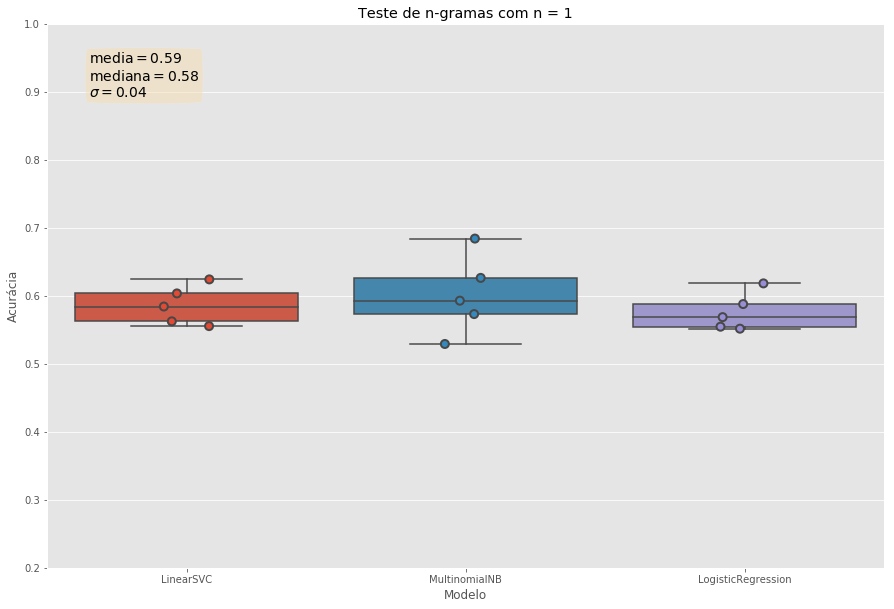

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
MultinomialNB         0.601415
LinearSVC             0.586234
LogisticRegression    0.576468
Name: Acur√°cia, dtype: float64


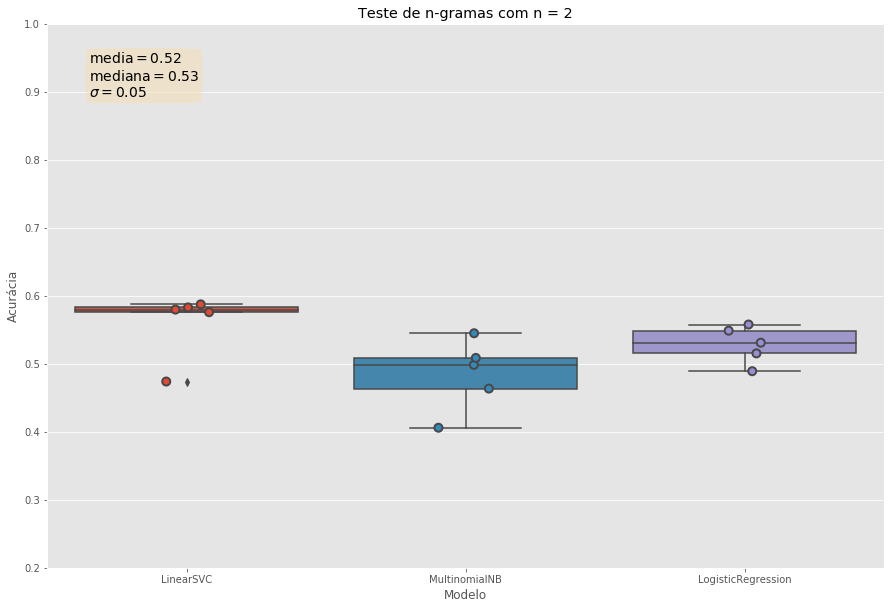

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LinearSVC             0.560240
LogisticRegression    0.528637
MultinomialNB         0.484526
Name: Acur√°cia, dtype: float64


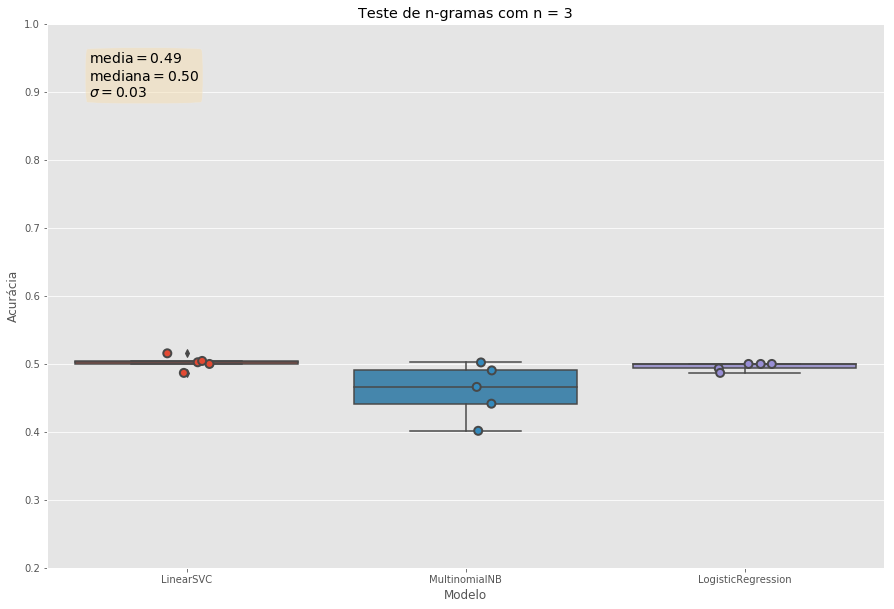

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LinearSVC             0.501883
LogisticRegression    0.496053
MultinomialNB         0.460415
Name: Acur√°cia, dtype: float64


In [55]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acur√°cia'])
    
    mean = cv_df['Acur√°cia'].mean()
    sigma = cv_df['Acur√°cia'].std()
    median = cv_df['Acur√°cia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acur√°cia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acur√°cia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # Propriedades do matplotlib.patch.Patch
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # Colocando dados no canto superior esquerdo
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acur√°cia m√©dia')
    print()
    print(cv_df.groupby('Modelo').Acur√°cia.mean().sort_values(ascending=False))

Com a an√°lise para uni, bi e tri-gramas fica claro que optar por unigramas parece uma op√ß√£o mais razo√°vel quando nos baseamos na acur√°cia m√©dia.

# Teste dos algoritmos com o modelo tf-idf

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classifica√ß√£o: utiliza tf-idf e valida√ß√£o cruzada.

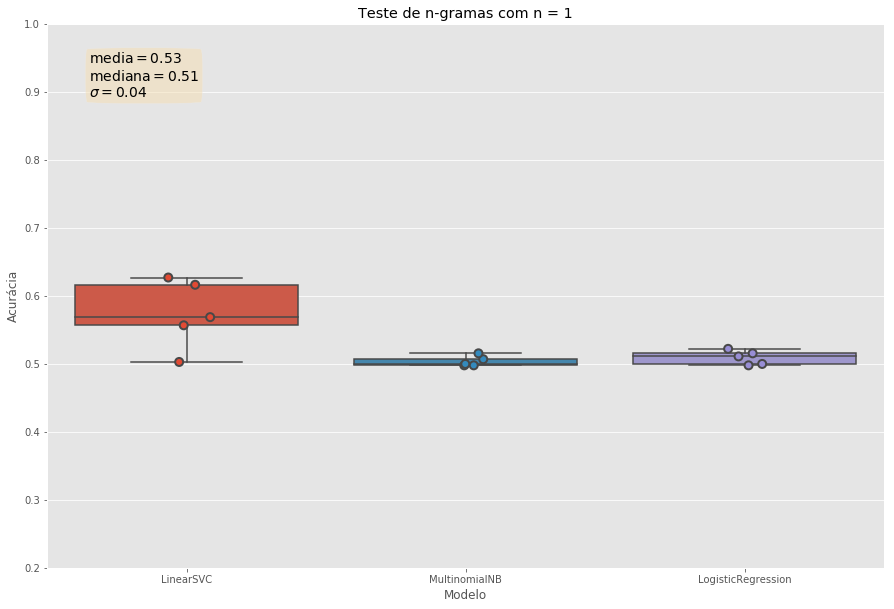

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LinearSVC             0.574480
LogisticRegression    0.509386
MultinomialNB         0.503713
Name: Acur√°cia, dtype: float64


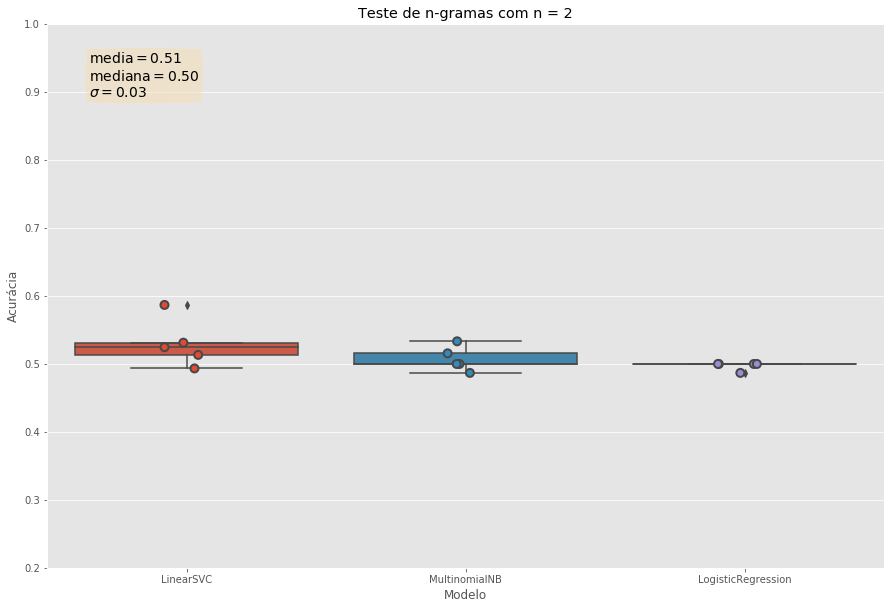

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LinearSVC             0.529918
MultinomialNB         0.507164
LogisticRegression    0.497368
Name: Acur√°cia, dtype: float64


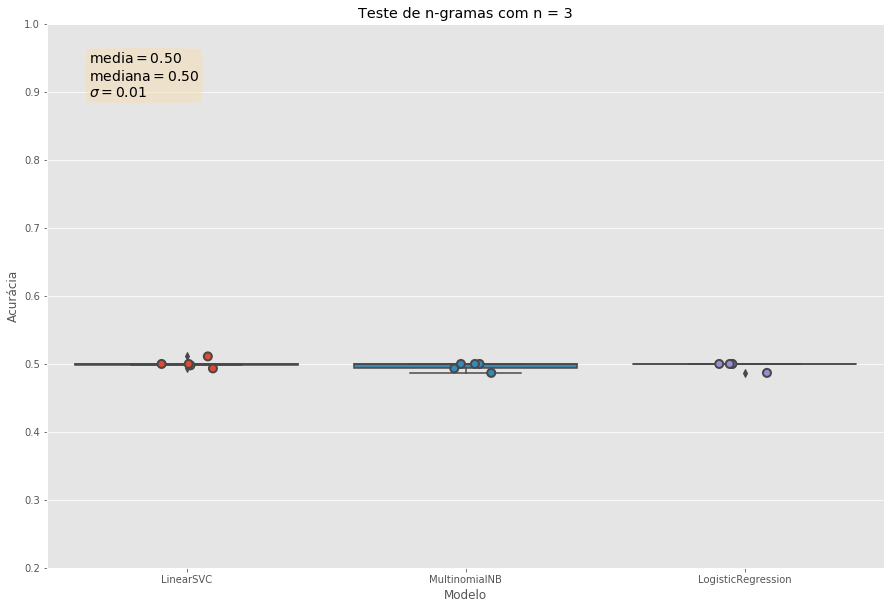

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LinearSVC             0.500497
LogisticRegression    0.497368
MultinomialNB         0.496053
Name: Acur√°cia, dtype: float64


In [56]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    tvec = TfidfVectorizer(analyzer='word',
                           stop_words=stopwords, 
                           ngram_range=(ngram, ngram)
    )

    features = tvec.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acur√°cia'])
    
    mean = cv_df['Acur√°cia'].mean()
    sigma = cv_df['Acur√°cia'].std()
    median = cv_df['Acur√°cia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acur√°cia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acur√°cia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acur√°cia m√©dia')
    print()
    print(cv_df.groupby('Modelo').Acur√°cia.mean().sort_values(ascending=False))



## Teste de performance dos algoritmos utilizando oversampling

In [57]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(ngram, ngram)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

print('Original train dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

features, labels = ros.fit_resample(X_train, y_train)

print('Resampled whole dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

print('New train dataset shape %s' % Counter(y_train))

Original train dataset shape Counter({0: 379, 1: 225})
Resampled whole dataset shape Counter({0: 379, 1: 379})
New train dataset shape Counter({1: 276, 0: 254})


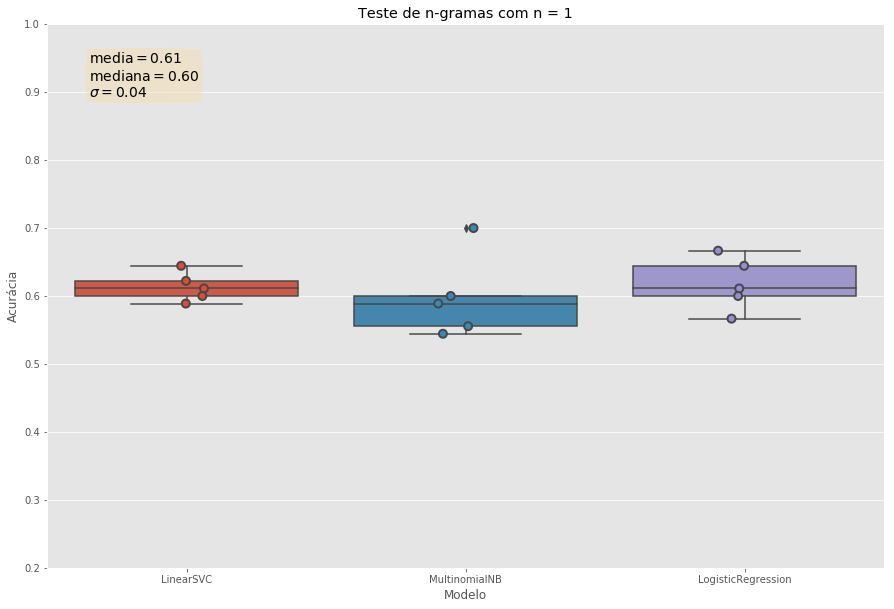

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LogisticRegression    0.617778
LinearSVC             0.613333
MultinomialNB         0.597778
Name: Acur√°cia, dtype: float64


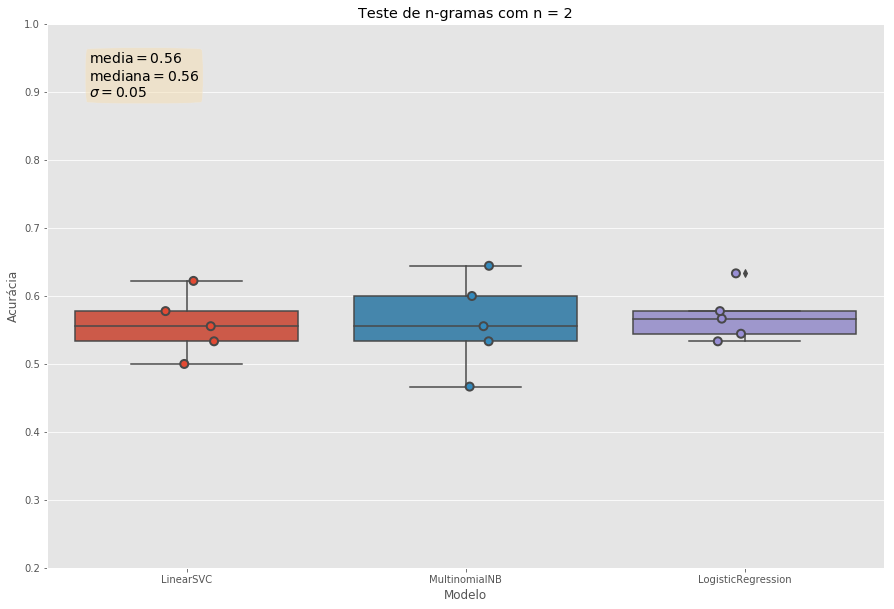

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LogisticRegression    0.571111
MultinomialNB         0.560000
LinearSVC             0.557778
Name: Acur√°cia, dtype: float64


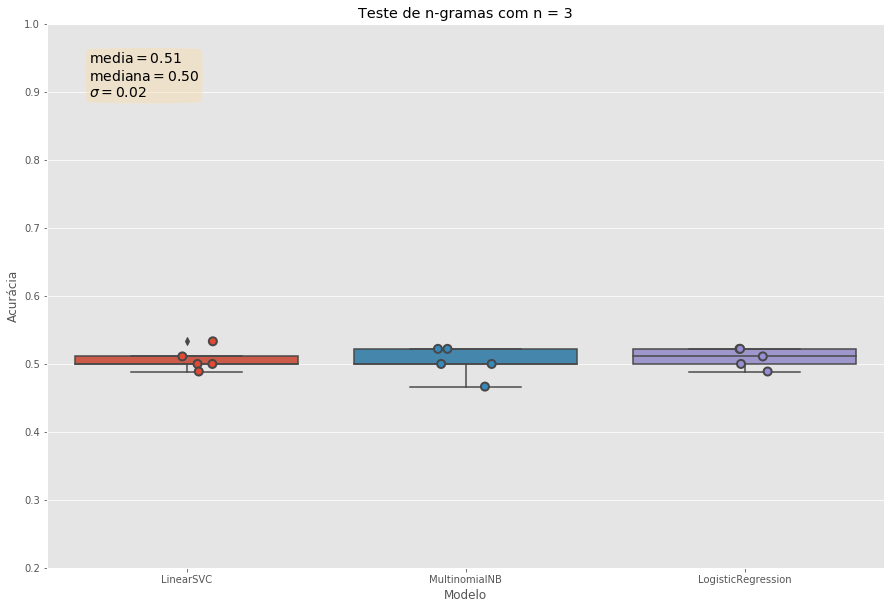

Algoritmos ordenados por ordem de acur√°cia m√©dia

Modelo
LogisticRegression    0.508889
LinearSVC             0.506667
MultinomialNB         0.502222
Name: Acur√°cia, dtype: float64


In [58]:
ngrams = [1, 2, 3]
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
    
for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels
    
    features, labels = rus.fit_resample(features, labels)

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acur√°cia'])
    
    mean = cv_df['Acur√°cia'].mean()
    sigma = cv_df['Acur√°cia'].std()
    median = cv_df['Acur√°cia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acur√°cia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acur√°cia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acur√°cia m√©dia')
    print()
    print(cv_df.groupby('Modelo').Acur√°cia.mean().sort_values(ascending=False))

## Sigm√≥ide

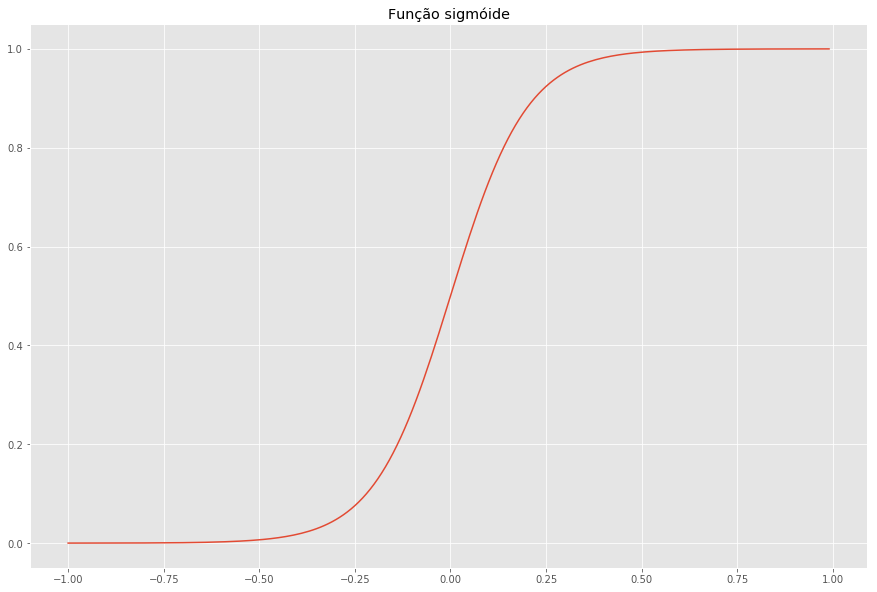

In [59]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item*10)))
    return a

x = np.arange(-1.0, 1.0, 0.01)
sig = sigmoid(x)

plt.title('Fun√ß√£o sigm√≥ide')
plt.plot(x,sig)
plt.show()

## Hiperplano

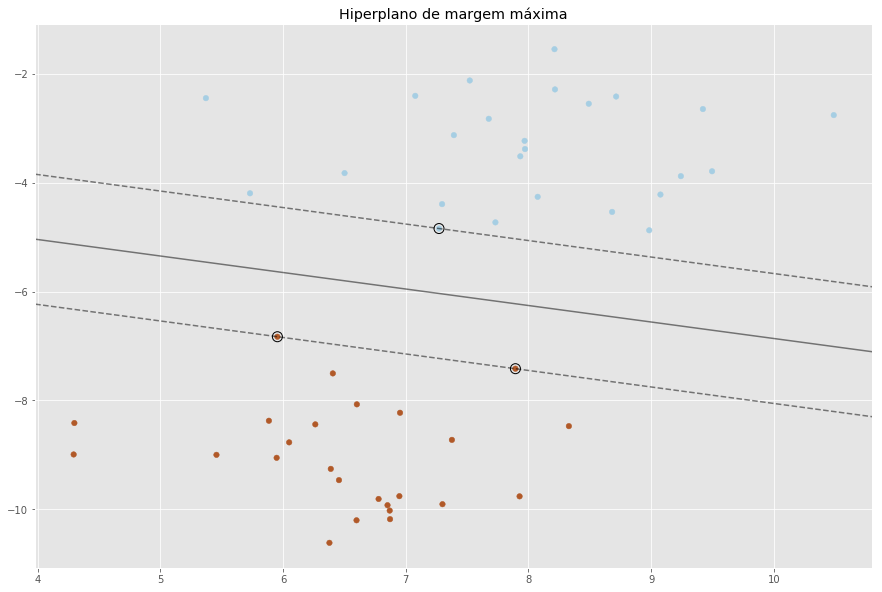

In [60]:

from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('Hiperplano de margem m√°xima')
plt.show()

# FINAL!!!!!!!!!!!!!!!!!!!!

# CASO B√ÅSICO

In [61]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZA√á√ÉO DOS ALGORITMOS

### SVM

In [62]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}


In [63]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma √© mais r√°pido 

svm = SVC(kernel='rbf', gamma=1, C=2, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [64]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       101
           1       0.60      0.06      0.11        50

   micro avg       0.68      0.68      0.68       151
   macro avg       0.64      0.52      0.46       151
weighted avg       0.65      0.68      0.57       151

[[99  2]
 [47  3]]


## Tunando logit

In [65]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [66]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [67]:
# Predict target vector
logit_predicted = logit_fitted.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       101
           1       0.46      0.42      0.44        50

   micro avg       0.64      0.64      0.64       151
   macro avg       0.59      0.59      0.59       151
weighted avg       0.64      0.64      0.64       151



# Naive Bayes

Naive Bayes n√£o pode ser tunado pois n√£o tem hiperpar√¢metros, usamos ent√£o o mesmo testado anteriormente.

In [68]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [69]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [70]:
predic = nb_fitted.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       101
           1       0.49      0.66      0.56        50

   micro avg       0.66      0.66      0.66       151
   macro avg       0.65      0.66      0.64       151
weighted avg       0.70      0.66      0.67       151



## Gr√°fico com as curvas ROC

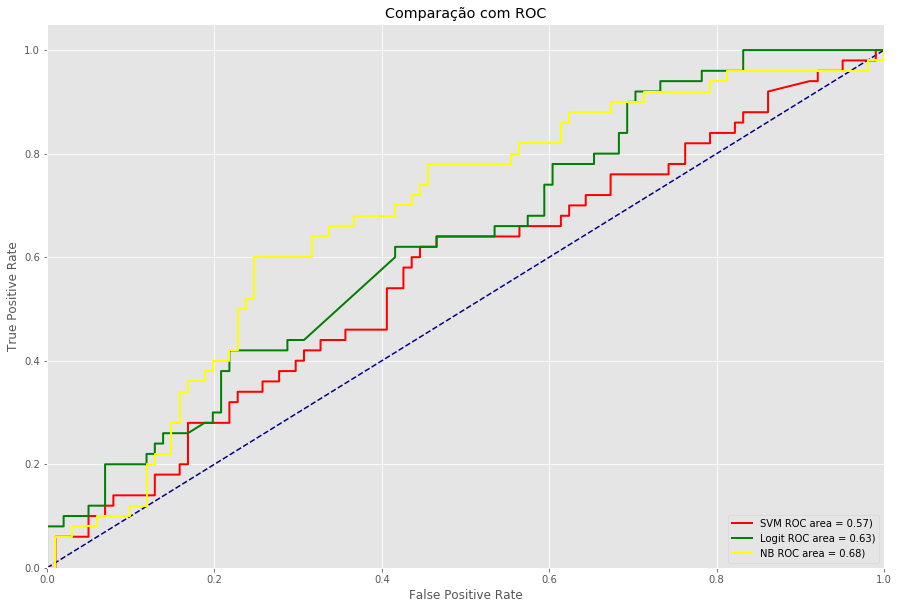

In [71]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Compara√ß√£o com ROC')

plt.show()

# COM OVERSAMPLING

In [72]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

ros = RandomOverSampler(random_state=42)
features, labels = ros.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZA√á√ÉO DOS ALGORITMOS

### SVM

In [73]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [74]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma √© mais r√°pido 

svm = SVC(kernel='rbf', gamma=1, C=2, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [75]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       100
           1       0.95      0.59      0.73        90

   micro avg       0.79      0.79      0.79       190
   macro avg       0.84      0.78      0.78       190
weighted avg       0.83      0.79      0.78       190

[[97  3]
 [37 53]]


## Tunando logit

In [76]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [77]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [78]:
# Predict target vector
logit_predicted = logit_fitted.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.68      0.50      0.58       100
           1       0.57      0.74      0.65        90

   micro avg       0.62      0.62      0.62       190
   macro avg       0.63      0.62      0.61       190
weighted avg       0.63      0.62      0.61       190



# Naive Bayes

Naive Bayes n√£o pode ser tunado pois n√£o tem hiperpar√¢metros, usamos ent√£o o mesmo testado anteriormente.

In [79]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [80]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [81]:
predic = nb_fitted.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       100
           1       0.67      0.80      0.73        90

   micro avg       0.72      0.72      0.72       190
   macro avg       0.73      0.73      0.72       190
weighted avg       0.73      0.72      0.72       190



## Gr√°fico com as curvas ROC

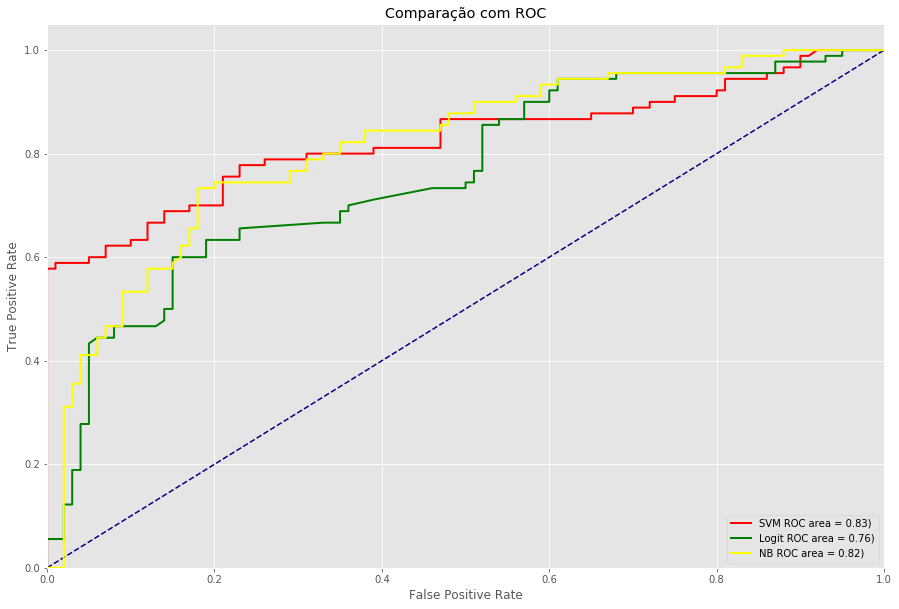

In [82]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Compara√ß√£o com ROC')

plt.show()

Para o caso utilizando oversampling, Naive Bayes parece √© o que performa melhor observando a √°rea sobre a curva de recep√ß√£o dos classificadores.

# COM UNDERSAMPLING

In [83]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

rus = RandomUnderSampler(random_state=42)
features, labels = rus.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZA√á√ÉO DOS ALGORITMOS

### SVM

In [84]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}


In [85]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma √© mais r√°pido 

svm = SVC(kernel='rbf', gamma=1, C=2, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [86]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.47      0.94      0.62        53
           1       0.50      0.05      0.09        60

   micro avg       0.47      0.47      0.47       113
   macro avg       0.48      0.50      0.36       113
weighted avg       0.48      0.47      0.34       113

[[50  3]
 [57  3]]


## Tunando logit

In [87]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [88]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [89]:
# Predict target vector
logit_predicted = logit_fitted.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        53
           1       0.67      0.70      0.68        60

   micro avg       0.65      0.65      0.65       113
   macro avg       0.65      0.65      0.65       113
weighted avg       0.65      0.65      0.65       113



# Naive Bayes

Naive Bayes n√£o pode ser tunado pois n√£o tem hiperpar√¢metros, usamos ent√£o o mesmo testado anteriormente.

In [90]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [91]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [92]:
predic = nb_fitted.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64        53
           1       0.68      0.63      0.66        60

   micro avg       0.65      0.65      0.65       113
   macro avg       0.65      0.65      0.65       113
weighted avg       0.65      0.65      0.65       113



## Gr√°fico com as curvas ROC

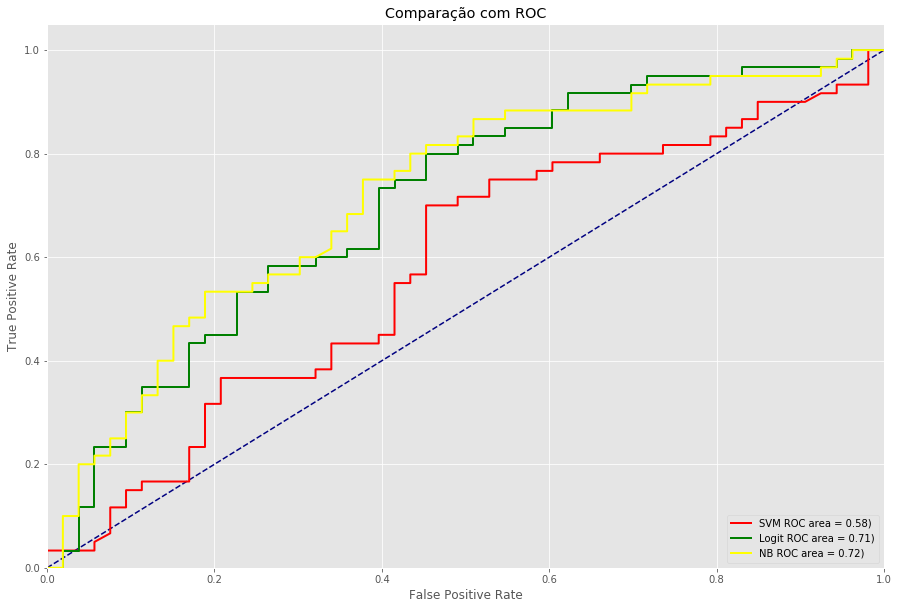

In [93]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Compara√ß√£o com ROC')

plt.show()